# Installing Libraries

In [1]:
pip install tensorflow numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# IMPORT LIBRARIES

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATASET

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# PREPROCESSING

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# MODEL ARCHITECTURE (HIGH ACCURACY)

In [5]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# COMPILE MODEL

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,370 (1.26 MB)

 Trainable params: 330,666 (1.26 MB)

 Non-trainable params: 704 (2.75 KB)

# CALLBACKS

In [7]:
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# TRAIN MODEL

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=25,
    batch_size=128,
    validation_split=0.1,
    callbacks=[lr_reduce, early_stop]
)

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.8401 - loss: 0.5341 - val_accuracy: 0.6102 - val_loss: 1.0803 - learning_rate: 0.0010
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9748 - loss: 0.0806 - val_accuracy: 0.9838 - val_loss: 0.0545 - learning_rate: 0.0010
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9827 - loss: 0.0563 - val_accuracy: 0.9900 - val_loss: 0.0315 - learning_rate: 0.0010
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9853 - loss: 0.0505 - val_accuracy: 0.9902 - val_loss: 0.0327 - learning_rate: 0.0010
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9864 - loss: 0.0427 - val_accuracy: 0.9903 - val_loss: 0.0304 - learning_rate: 0.0010
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9880 - loss: 0.0371 - val_accuracy: 0.9920 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9904 - l

# EVALUATE MODEL

In [9]:
loss, acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9926 - loss: 0.0214

✅ Test Accuracy: 99.35%


# SAVE MODEL

In [10]:
model.save(f"mnist_{acc * 100:.0f}_model.h5")
print("✅ Model saved as mnist_99_model.h5")

✅ Model saved as mnist_99_model.h5


# TEST WITH RANDOM IMAGE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


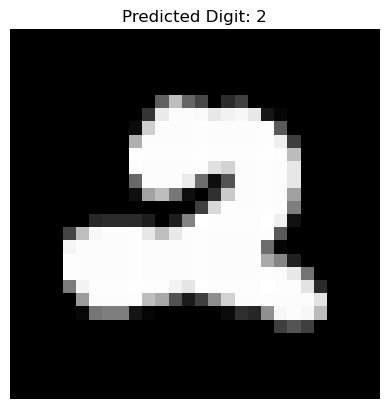

In [17]:
index = np.random.randint(0, len(x_test))
image = x_test[index]

prediction = model.predict(image.reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()